In [4]:
#import some popular libraries we will use in this project 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#reading the DataFile
data = pd.read_csv("bodyPerformance.csv", sep = "," , encoding="utf-8")

In [6]:
#Displaying The Data
data

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0           54.9                     18.4            60.0          217.0     C  
1           36.4                     16.3            53.0          229.0     A  
2           44.8                     12.0            49.0          181.0     C  
3           41.4                     15.2            53.0          219.0     B  
4           43.5                     27.1            45.0          217.0     B  
...          ...                      ...             ...            ...   ...  
13388       35.8                     17.4            47.0          198.0     C  
13389       33.0                      1.1            48.0          167.0     D  
13390       63.5                     16.4            45.0          229.0     A  
13391       19.3                      9.2             0.0           75.0     D  
13392       35.9                      7.1            51.0          180.0     C  

[13393 rows x 12 columns]

In [260]:
#checking the null values in the dataset
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

> there is no null values in this data

In [261]:
#Return all distinct value in each column
data.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [262]:
#return some information about each column as DataType and Number of Entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [7]:
# change all float DataTypes to int ones 

data['age']=data.age.astype(int)
data['height_cm']=data.height_cm.astype(int)
data['weight_kg']=data.weight_kg.astype(int)
data['body fat_%']=data['body fat_%'].astype(int)
data['diastolic']=data.diastolic.astype(int)
data['systolic']=data.systolic.astype(int)
data['gripForce']=data.gripForce.astype(int)

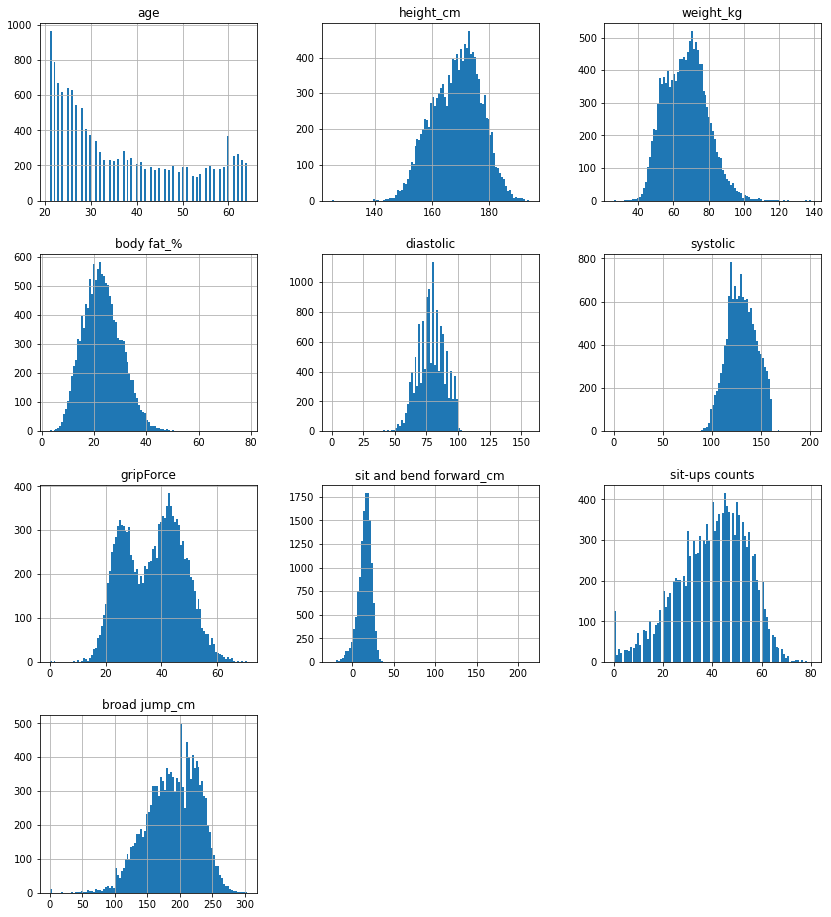

In [263]:
#Histogram of all data's feature Distribution
data.hist(bins=100 , figsize=(14,16))
plt.show()

## explaining data

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

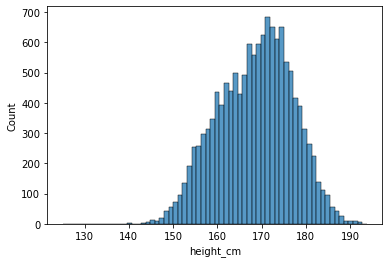

In [264]:
#Height Distribution
sns.histplot(data = data,x = 'height_cm')

> from this graph we found that the most exist in the interval 165 cm : 175 cm

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

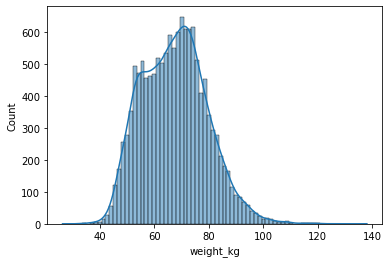

In [265]:
#Weight Distribution
sns.histplot(data = data,x = 'weight_kg',kde=True)

> from this graph we found that the most exist in the interval 50 : 80

<AxesSubplot:ylabel='gender'>

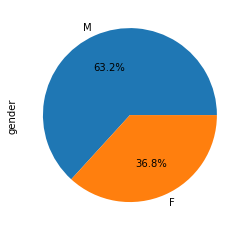

In [266]:
#Gender Distribution
round(data['gender'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

> we found that the percantage of male is higher than female percantage (the number of males is double the number of females)

<AxesSubplot:xlabel='gender', ylabel='count'>

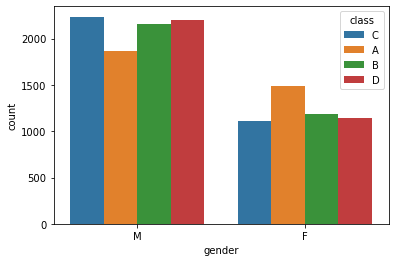

In [267]:
#Class Distribution w.r.t gender
sns.countplot(x = data['gender'], data = data, hue = data['class'])

<AxesSubplot:ylabel='class'>

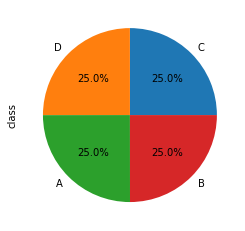

In [268]:
#Classes Distribution
round(data['class'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

> the 4 classes are equally distributed in this data

<AxesSubplot:xlabel='age', ylabel='Count'>

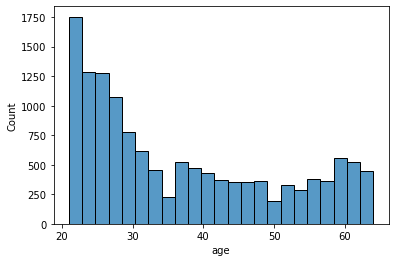

In [269]:
#Age Distribution
sns.histplot(data = data,x = 'age')

### Label Encoding to (gender, class) columns

In [8]:
data['gender'].value_counts()

M    8467
F    4926
Name: gender, dtype: int64

In [9]:
data['class'].value_counts()

D    3349
C    3349
A    3348
B    3347
Name: class, dtype: int64

In [10]:
data.replace("M", 0 , inplace = True)
data.replace("F", 1 , inplace = True)

In [11]:
data.replace("A", 0 , inplace = True)
data.replace("B", 1 , inplace = True)
data.replace("C", 2 , inplace = True)
data.replace("D", 3 , inplace = True)

In [12]:
data

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0       27       0        172         75          21         80       130   
1       25       0        165         55          15         77       126   
2       31       0        179         78          20         92       152   
3       32       0        174         71          18         76       147   
4       28       0        173         67          17         70       127   
...    ...     ...        ...        ...         ...        ...       ...   
13388   25       0        172         71          16         74       141   
13389   21       0        179         63          12         74       128   
13390   39       0        177         80          20         78       132   
13391   64       1        146         57          40         68       121   
13392   34       0        164         66          19         82       150   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  \
0             54                     18.4            60.0          217.0   
1             36                     16.3            53.0          229.0   
2             44                     12.0            49.0          181.0   
3             41                     15.2            53.0          219.0   
4             43                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388         35                     17.4            47.0          198.0   
13389         33                      1.1            48.0          167.0   
13390         63                     16.4            45.0          229.0   
13391         19                      9.2             0.0           75.0   
13392         35                      7.1            51.0          180.0   

       class  
0          2  
1          0  
2          2  
3          1  
4          1  
...      ...  
13388      2  
13389      3  
13390      0  
13391      3  
13392      2  

[13393 rows x 12 columns]

### Correlation Matrix for the data

<AxesSubplot:>

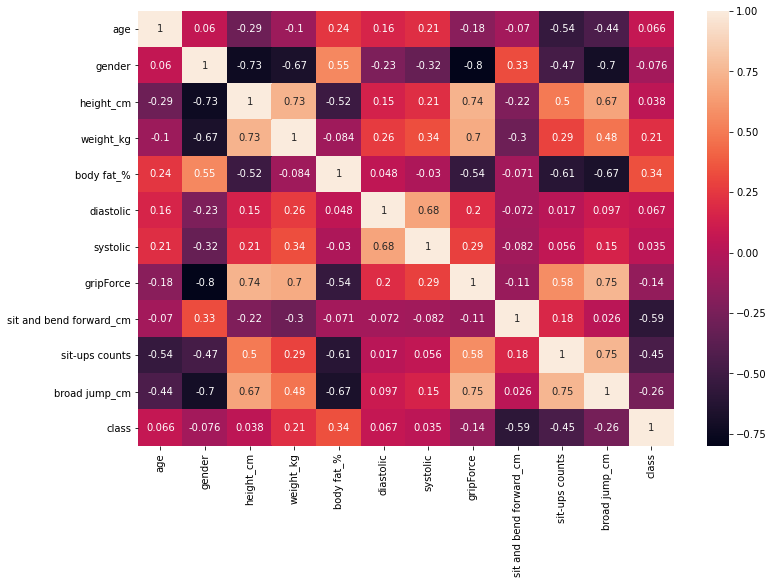

In [275]:
plt.figure(figsize=(12,8))
sns.heatmap( data.corr(), annot = True)

### Conclusions from crr matrix:
    1. there is high relation between the Height and BroadJump this indicates that More Height is strongly related to higher BroadJump.
    2. there is high relation between the Height and GripForce this indicates that More Height is strongly related to more GripForce.
    3. there is high relation between the Height and Weight this indicates that More Height is strongly related to more Weight.
    4. there is high relation between the Weight and GripForce this indicates that More Weight is strongly related to more GripForce.
    5. there is relation between Systolic and Diastolic.
    6. there is high relation between the GripForce and BroadJump this indicates that More GripForce is strongly related to higher BroadJump.
    7. there is high relation between the Sit-ups counts and BroadJump this indicates that More Sit-ups counts is strongly related to higher BroadJump.

## Detecting outliers 

<AxesSubplot:>

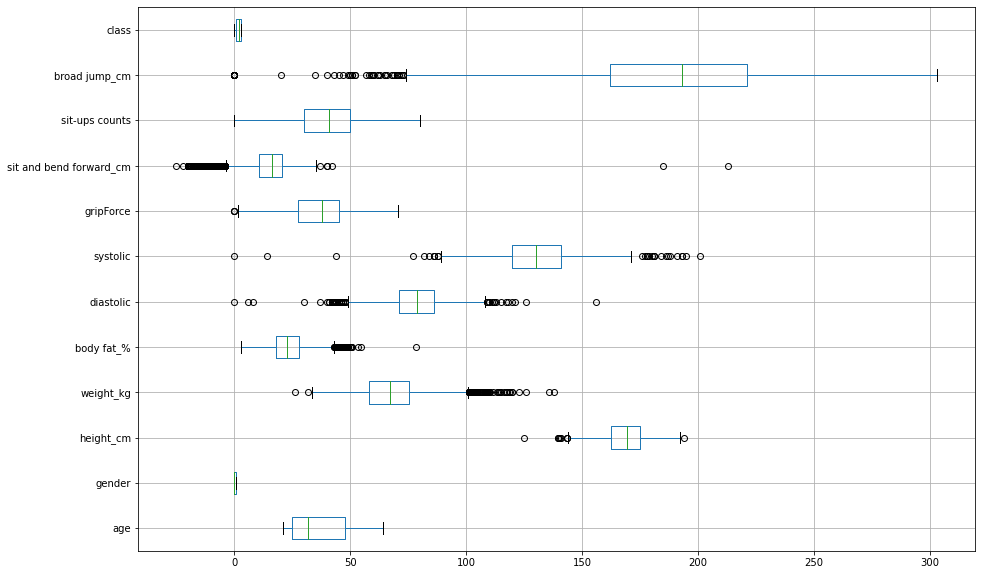

In [276]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0)

In [277]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [13]:
#Replacing some names of columns to be easily used in the way we implement it to remove outliers 
data.columns = data.columns.str.replace('sit and bend forward_cm', 'sit_and_bend_forward_cm')

In [14]:
data.columns = data.columns.str.replace('sit-ups_counts', 'sit_ups_counts')
data.columns = data.columns.str.replace('broad jump_cm', 'broad_jump_cm')
data.columns = data.columns.str.replace('body fat_%', 'body_fat_per')
data

age  gender  height_cm  weight_kg  body_fat_per  diastolic  systolic  \
0       27       0        172         75            21         80       130   
1       25       0        165         55            15         77       126   
2       31       0        179         78            20         92       152   
3       32       0        174         71            18         76       147   
4       28       0        173         67            17         70       127   
...    ...     ...        ...        ...           ...        ...       ...   
13388   25       0        172         71            16         74       141   
13389   21       0        179         63            12         74       128   
13390   39       0        177         80            20         78       132   
13391   64       1        146         57            40         68       121   
13392   34       0        164         66            19         82       150   

       gripForce  sit_and_bend_forward_cm  sit-ups counts  broad_jump_cm  \
0             54                     18.4            60.0          217.0   
1             36                     16.3            53.0          229.0   
2             44                     12.0            49.0          181.0   
3             41                     15.2            53.0          219.0   
4             43                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388         35                     17.4            47.0          198.0   
13389         33                      1.1            48.0          167.0   
13390         63                     16.4            45.0          229.0   
13391         19                      9.2             0.0           75.0   
13392         35                      7.1            51.0          180.0   

       class  
0          2  
1          0  
2          2  
3          1  
4          1  
...      ...  
13388      2  
13389      3  
13390      0  
13391      3  
13392      2  

[13393 rows x 12 columns]

<AxesSubplot:>

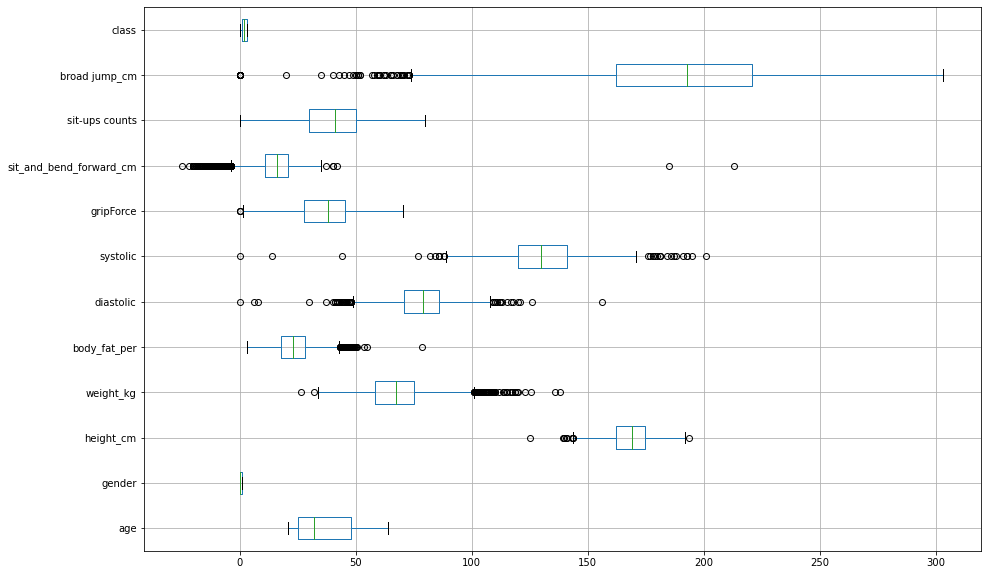

In [280]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0)

In [281]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body_fat_per', 'diastolic',
       'systolic', 'gripForce', 'sit_and_bend_forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [15]:
min_thresold, max_thresold = data.broad_jump_cm.quantile([0.005, 1])
min_thresold, max_thresold

(79.92000000000002, 303.0)

In [16]:
data2 = data[(data.broad_jump_cm<max_thresold) & (data.broad_jump_cm>min_thresold)]
data2.shape

(13325, 12)

In [17]:
min_thresold, max_thresold = data2.sit_and_bend_forward_cm.quantile([0.050, 0.996])
min_thresold, max_thresold

(0.3, 32.17039999999997)

In [18]:
data3 = data2[(data2.sit_and_bend_forward_cm<max_thresold) & (data2.sit_and_bend_forward_cm>min_thresold)]
data3.shape

(12595, 12)

In [19]:
min_thresold, max_thresold = data3.systolic.quantile([0.001, 0.998])
min_thresold, max_thresold

(89.594, 164.6239999999998)

In [20]:
data4 = data3[(data3.systolic<max_thresold) & (data3.systolic>min_thresold)]
data4.shape

(12556, 12)

In [21]:
min_thresold, max_thresold = data4.diastolic.quantile([0.003, 0.999])
min_thresold, max_thresold

(50.0, 104.44500000000153)

In [22]:
data5 = data4[(data4.diastolic<max_thresold) & (data4.diastolic>min_thresold)]
data5.shape

(12502, 12)

In [23]:
min_thresold, max_thresold = data5.body_fat_per.quantile([0.001, 0.99])
min_thresold, max_thresold

(5.0, 40.0)

In [24]:
data6 = data5[(data5.body_fat_per<max_thresold) & (data5.body_fat_per>min_thresold)]
data6.shape

(12326, 12)

In [25]:
min_thresold, max_thresold = data6.weight_kg.quantile([0.001, 0.99])
min_thresold, max_thresold

(38.325, 95.0)

In [26]:
data7 = data6[(data6.weight_kg<max_thresold) & (data6.weight_kg>min_thresold)]
data7.shape

(12167, 12)

In [27]:
min_thresold, max_thresold = data7.height_cm.quantile([0.001, 0.9999])
min_thresold, max_thresold

(145.0, 191.0)

In [28]:
data8 = data7[(data7.height_cm<max_thresold) & (data7.height_cm>min_thresold)]
data8.shape

(12141, 12)

<AxesSubplot:>

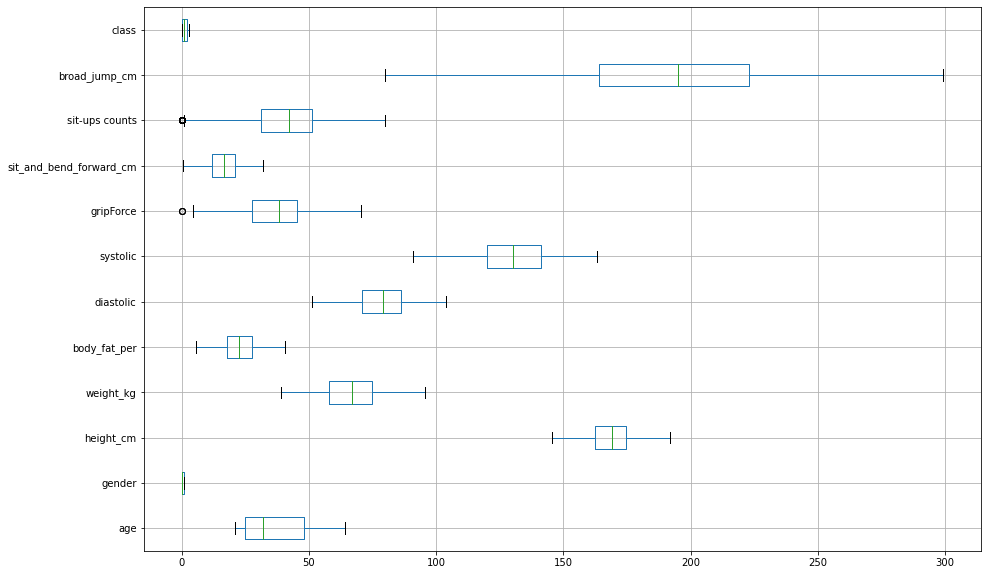

In [398]:
plt.figure(figsize=(15,10))
data8.boxplot(vert=0)

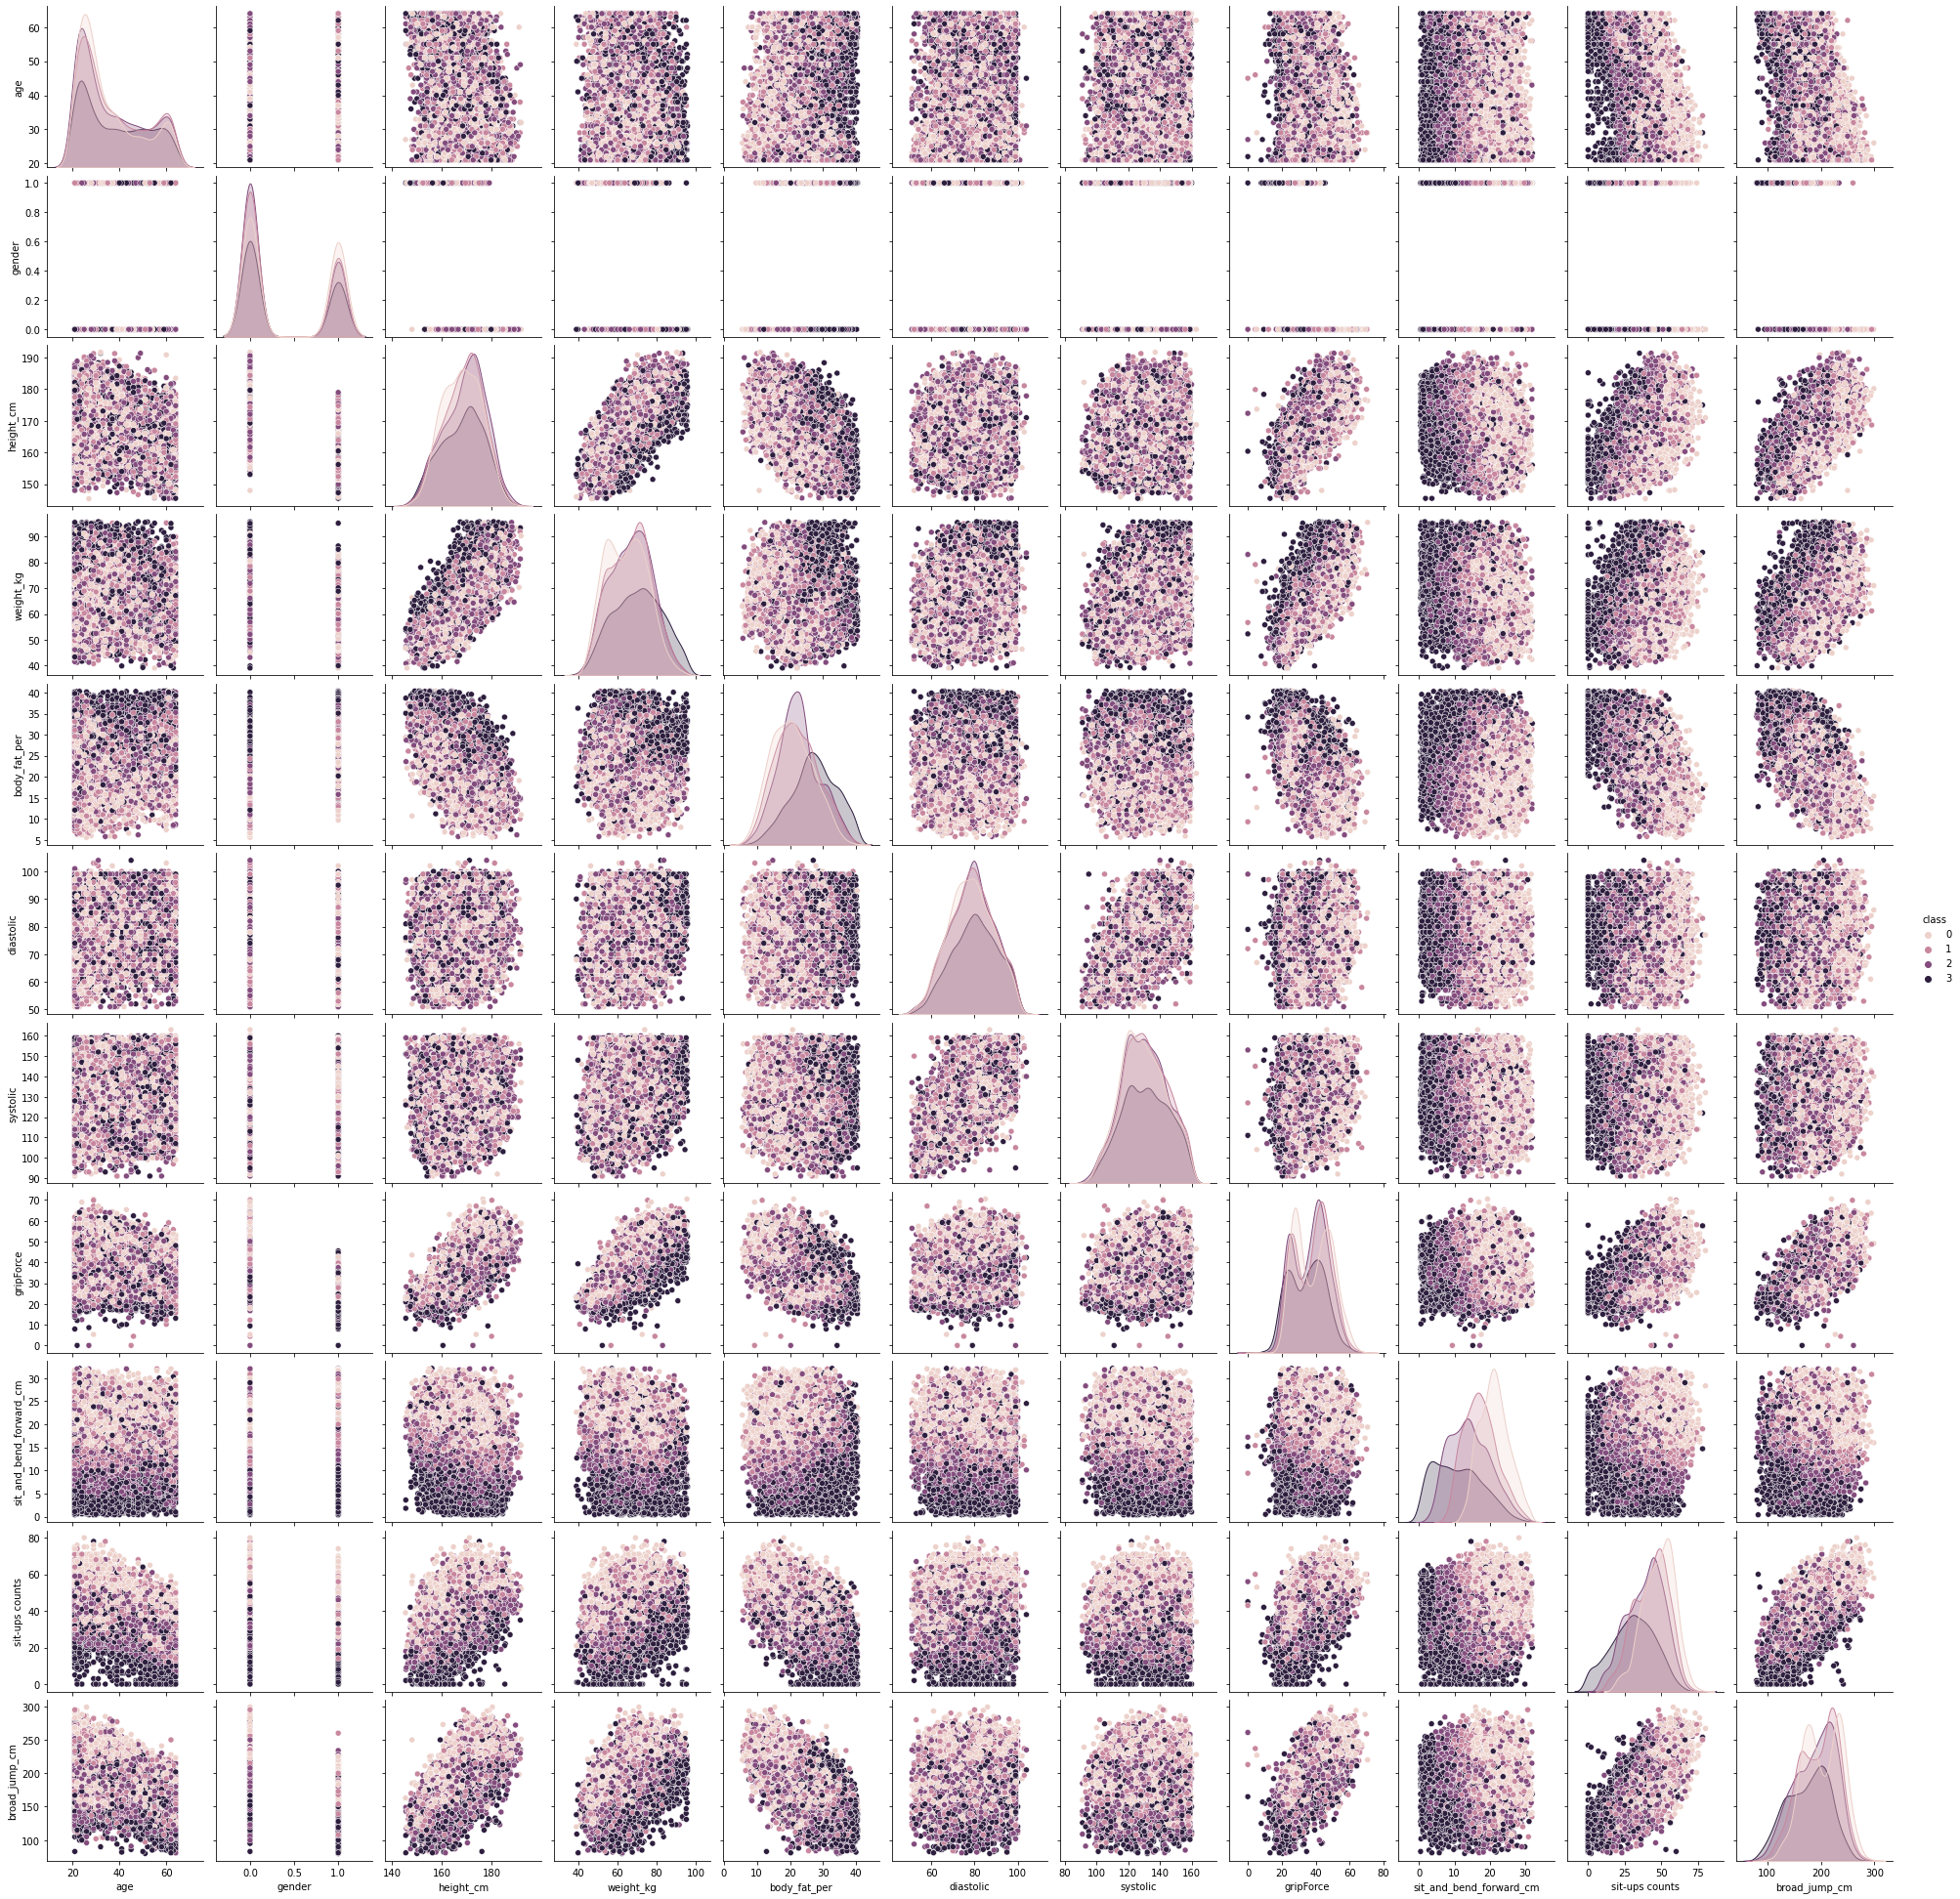

In [399]:
sns.pairplot(data8, hue="class")

## Model

In [29]:
X = data8.drop("class" , axis = 1).values
y = data8['class'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

### KNN Model 

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
kclf = KNeighborsClassifier(n_neighbors=6 )

In [96]:
kclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [97]:
kclf_score_train = kclf.score(X_train,y_train)

In [98]:
kclf_score_test = kclf.score(X_test,y_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
y_predict = kclf.fit(X_train, y_train).predict(X_test)

In [101]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']

In [102]:
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.62      0.80      0.70       851
     Class B       0.46      0.48      0.47       847
     Class C       0.54      0.50      0.52       793
     Class D       0.85      0.48      0.61       545

    accuracy                           0.57      3036
   macro avg       0.62      0.56      0.57      3036
weighted avg       0.59      0.57      0.57      3036



<AxesSubplot:>

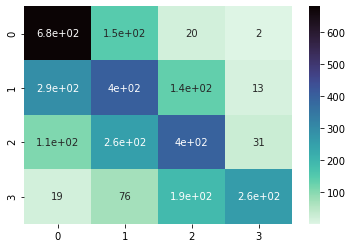

In [103]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

### Logistic Regression Model 

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(X_train,y_train)

LogisticRegression()

In [68]:
lr_score_train = lr.score(X_train,y_train)

In [69]:
lr_score_test = lr.score(X_test,y_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
y_predict = lr.fit(X_train, y_train).predict(X_test)

In [80]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']

In [81]:
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.69      0.68      0.68       851
     Class B       0.45      0.41      0.43       847
     Class C       0.50      0.55      0.52       793
     Class D       0.68      0.68      0.68       545

    accuracy                           0.57      3036
   macro avg       0.58      0.58      0.58      3036
weighted avg       0.57      0.57      0.57      3036



<AxesSubplot:>

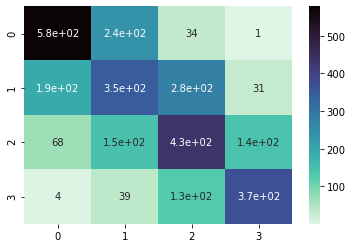

In [83]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

### Random Forest Model 

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
rf_score_train = rf.score(X_train,y_train)

In [88]:
rf_score_test = rf.score(X_test,y_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
y_predict = rf.fit(X_train, y_train).predict(X_test)

In [91]:
target_names = ['Class A', 'Class B', 'Class C', 'Class D']

In [92]:
print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class A       0.73      0.77      0.75       851
     Class B       0.58      0.58      0.58       847
     Class C       0.66      0.66      0.66       793
     Class D       0.82      0.73      0.77       545

    accuracy                           0.68      3036
   macro avg       0.70      0.69      0.69      3036
weighted avg       0.68      0.68      0.68      3036



<AxesSubplot:>

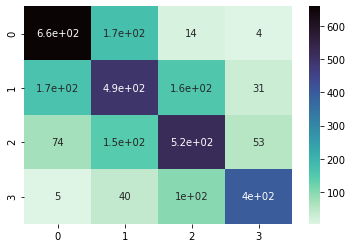

In [93]:
cm = pd.DataFrame(confusion_matrix(y_test, y_predict))
sns.heatmap(cm, annot=True,cmap="mako_r")

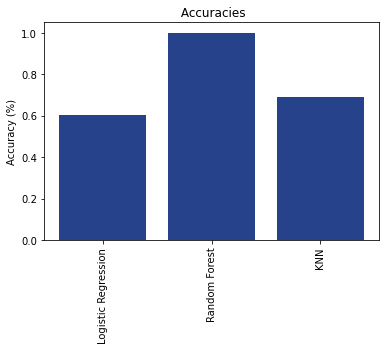

In [104]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_train, rf_score_train, kclf_score_train]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title(' Accuracies')
plt.show()

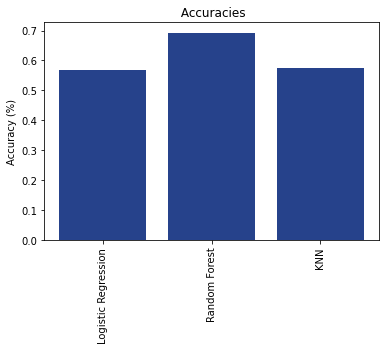

In [105]:
predictors_group = ('Logistic Regression','Random Forest','KNN')
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, kclf_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)',)
plt.title(' Accuracies')
plt.show()

## Business Solutions

In [424]:
data

age  gender  height_cm  weight_kg  body_fat_per  diastolic  systolic  \
0      27.0       0      172.3      75.24          21.3       80.0     130.0   
1      25.0       0      165.0      55.80          15.7       77.0     126.0   
2      31.0       0      179.6      78.00          20.1       92.0     152.0   
3      32.0       0      174.5      71.10          18.4       76.0     147.0   
4      28.0       0      173.8      67.70          17.1       70.0     127.0   
...     ...     ...        ...        ...           ...        ...       ...   
13388  25.0       0      172.1      71.80          16.2       74.0     141.0   
13389  21.0       0      179.7      63.90          12.1       74.0     128.0   
13390  39.0       0      177.2      80.50          20.1       78.0     132.0   
13391  64.0       1      146.1      57.70          40.4       68.0     121.0   
13392  34.0       0      164.0      66.10          19.5       82.0     150.0   

       gripForce  sit_and_bend_forward_cm  sit-ups counts  broad_jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

       class  
0          2  
1          0  
2          2  
3          1  
4          1  
...      ...  
13388      2  
13389      3  
13390      0  
13391      3  
13392      2  

[13393 rows x 12 columns]

In [425]:
data.describe()

age        gender     height_cm     weight_kg  body_fat_per  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106      0.367804    168.559807     67.447316     23.240165   
std       13.625639      0.482226      8.426583     11.949666      7.256844   
min       21.000000      0.000000    125.000000     26.300000      3.000000   
25%       25.000000      0.000000    162.400000     58.200000     18.000000   
50%       32.000000      0.000000    169.200000     67.400000     22.800000   
75%       48.000000      1.000000    174.800000     75.300000     28.000000   
max       64.000000      1.000000    193.800000    138.100000     78.400000   

          diastolic      systolic     gripForce  sit_and_bend_forward_cm  \
count  13393.000000  13393.000000  13393.000000             13393.000000   
mean      78.796842    130.234817     36.963877                15.209268   
std       10.742033     14.713954     10.624864                 8.456677   
min        0.000000      0.000000      0.000000               -25.000000   
25%       71.000000    120.000000     27.500000                10.900000   
50%       79.000000    130.000000     37.900000                16.200000   
75%       86.000000    141.000000     45.200000                20.700000   
max      156.200000    201.000000     70.500000               213.000000   

       sit-ups counts  broad_jump_cm         class  
count    13393.000000   13393.000000  13393.000000  
mean        39.771224     190.129627      1.500187  
std         14.276698      39.868000      1.118109  
min          0.000000       0.000000      0.000000  
25%         30.000000     162.000000      1.000000  
50%         41.000000     193.000000      2.000000  
75%         50.000000     221.000000      3.000000  
max         80.000000     303.000000      3.000000

In [446]:
def gym_subscription(row):
    if 10 <= row['sit_and_bend_forward_cm'] <= 14 or 0 <= row['sit-ups counts'] <= 30 or 0 <= row['broad_jump_cm'] <= 162:
        return 'gym subscription with 30% discount (first month)'
    elif 14 < row['sit_and_bend_forward_cm'] <= 17 or 30 < row['sit-ups counts'] <= 41 or 162 < row['broad_jump_cm'] <= 193:
        return 'gym subscription with 20% discount (first month)'
    elif 17 < row['sit_and_bend_forward_cm'] <= 213 or 41 < row['sit-ups counts'] <= 80 or 193 < row['broad_jump_cm'] <= 303:
        return 'gym subscription with 10% discount (first month)'
    else:
        return 'other'

In [432]:
def weight_offer(row):
    normal_weight = row['height_cm'] - 100
    if row['weight_kg'] > normal_weight - 10 or row['weight_kg'] > normal_weight + 10 and row['body_fat_per'] > 25:
        return "track your weight offer"
    else:
        return 'normal'

In [429]:
def blood_Pressure_offer(row):
    if row['diastolic'] < 65 or row['systolic'] > 135:
        return "blood pressure tracking offer"
    else:
        return 'normal'

In [447]:
data['gym_subscription'] = data.apply(gym_subscription , axis = 1)
data['weight_offer'] = data.apply(weight_offer , axis = 1)
data['blood_Pressure_offer'] = data.apply(blood_Pressure_offer , axis = 1)

In [448]:
data

age  gender  height_cm  weight_kg  body_fat_per  diastolic  systolic  \
0      27.0       0      172.3      75.24          21.3       80.0     130.0   
1      25.0       0      165.0      55.80          15.7       77.0     126.0   
2      31.0       0      179.6      78.00          20.1       92.0     152.0   
3      32.0       0      174.5      71.10          18.4       76.0     147.0   
4      28.0       0      173.8      67.70          17.1       70.0     127.0   
...     ...     ...        ...        ...           ...        ...       ...   
13388  25.0       0      172.1      71.80          16.2       74.0     141.0   
13389  21.0       0      179.7      63.90          12.1       74.0     128.0   
13390  39.0       0      177.2      80.50          20.1       78.0     132.0   
13391  64.0       1      146.1      57.70          40.4       68.0     121.0   
13392  34.0       0      164.0      66.10          19.5       82.0     150.0   

       gripForce  sit_and_bend_forward_cm  sit-ups counts  broad_jump_cm  \
0           54.9                     18.4            60.0          217.0   
1           36.4                     16.3            53.0          229.0   
2           44.8                     12.0            49.0          181.0   
3           41.4                     15.2            53.0          219.0   
4           43.5                     27.1            45.0          217.0   
...          ...                      ...             ...            ...   
13388       35.8                     17.4            47.0          198.0   
13389       33.0                      1.1            48.0          167.0   
13390       63.5                     16.4            45.0          229.0   
13391       19.3                      9.2             0.0           75.0   
13392       35.9                      7.1            51.0          180.0   

       class                                  gym_subscription  \
0          2  gym subscription with 10% discount (first month)   
1          0  gym subscription with 20% discount (first month)   
2          2  gym subscription with 30% discount (first month)   
3          1  gym subscription with 20% discount (first month)   
4          1  gym subscription with 10% discount (first month)   
...      ...                                               ...   
13388      2  gym subscription with 10% discount (first month)   
13389      3  gym subscription with 20% discount (first month)   
13390      0  gym subscription with 20% discount (first month)   
13391      3  gym subscription with 30% discount (first month)   
13392      2  gym subscription with 20% discount (first month)   

                  weight_offer           blood_Pressure_offer  
0      track your weight offer                         normal  
1      track your weight offer                         normal  
2      track your weight offer  blood pressure tracking offer  
3      track your weight offer  blood pressure tracking offer  
4      track your weight offer                         normal  
...                        ...                            ...  
13388  track your weight offer  blood pressure tracking offer  
13389                   normal                         normal  
13390  track your weight offer                         normal  
13391  track your weight offer                         normal  
13392  track your weight offer  blood pressure tracking offer  

[13393 rows x 15 columns]

<AxesSubplot:ylabel='gym_subscription'>

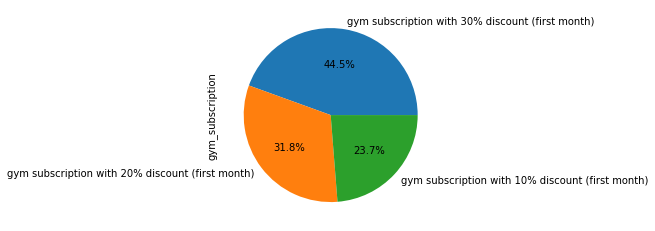

In [450]:
round(data['gym_subscription'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='weight_offer'>

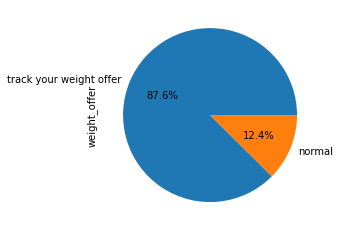

In [451]:
round(data['weight_offer'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='blood_Pressure_offer'>

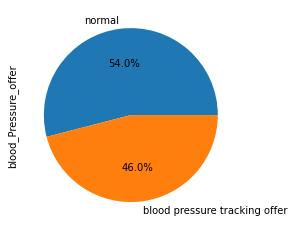

In [452]:
round(data['blood_Pressure_offer'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

#### Thank u 
##### Best Regerds, Ahmed  and Sohila